In [113]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '../Modules/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [114]:
from __future__ import division
import numpy as np
from setup import *
from plot import *
from OrbitalMotion import numerical_orbital_evolution, analytical_orbital_evolution, analytical_split
c,G,Msolar,AU, pc = univeral_constants()

In [115]:
#Choose system parameters 

#---Inner Binary---
m0 = 30*Msolar
m1 = 30*Msolar
f1 = 1e-3 #orbital frequency
a1 = semi_major_axis(m0+m1,f1)
e1 = 0.5 #eccentricity
J1 = angular_momentum(m0,m1,e1,a1)#angular momentum. Eq. 12 of Randal
g1 = np.pi


#---Outer Binary
beta=5
a2 = beta * a1
m2 = 10*Msolar
e2 = 0.6

#---Shared---
I = 60 * np.pi/180.0 #Inclination
nmodes = 20 #number of modes to sum over for GW
iota = 20 * np.pi/180  #angle of L vector w.r.t observer LOS 
D = 1e6 * pc #distance from source to observer 1Mpc




#Set initial gamma

mu = m0*m1/(m0+m1)
C = (-64/5) * G**3 *mu*(m0+m1)**2 /c**5
u = 1-e1**2
K = 3*G*m0*m1*m2/(8*(m0+m1)) *a2**(-3) * (1-e2**2)**(-3/2)
A = 5*K*np.sin(I)**2

  



#---Integration settings
Tint = 1
fs = 1e-3

#---Info for user
status(fs, Tint)


Sampling frequency =  0.001  Hz for an observation period of  1  years
Total number of integration steps is  31536.0
Frequency range is:  3.1709791983764586e-08  -  0.0005  Hz


Final t =  31536000
Finised numericals. 31536000.0 31536000 31536000.0 1000.0
Numerical orbital evolution has completed with fs =  0.001  Hz and Tobs =  1  years
Plotting the orbital parameter evolution
E limits = 0.5 0.4354709134747287 0.06452908652527128


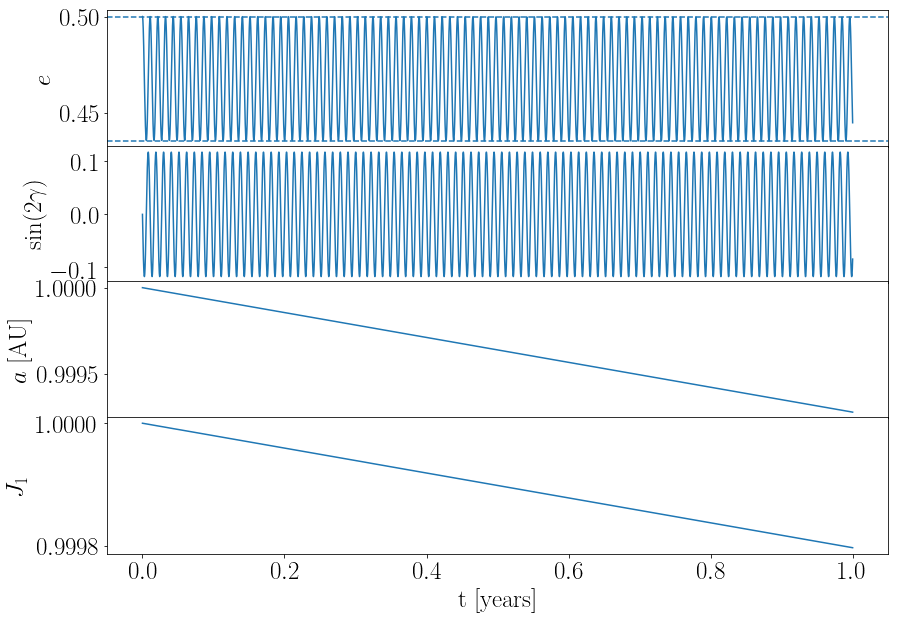

In [116]:
#Integrate numerically
output = numerical_orbital_evolution(m0,m1,m2,a1,e1,g1,J1,e2,a2,I,fs,Tint)
numerical_motion = output[0]
constants = output[1]
numerical_motion = output[0]

#np.save('../Data/NumericalSolution.npy',numerical_motion )
plot_motion(numerical_motion)

In [117]:
#Calculate the waveform
import GravRadiation as GR
constants = np.array([m0+m1, nmodes,iota,m0*m1/(m0+m1),D])
waveformNR = GR.Gwaves(numerical_motion, constants)
#np.save('../Data/NumericalWaveform.npy',waveformNR)



Getting the waveform
Mode sum. n =  1.0 20.0
Mode sum. n =  2.0 20.0
Mode sum. n =  3.0 20.0
Mode sum. n =  4.0 20.0
Mode sum. n =  5.0 20.0
Mode sum. n =  6.0 20.0
Mode sum. n =  7.0 20.0
Mode sum. n =  8.0 20.0
Mode sum. n =  9.0 20.0
Mode sum. n =  10.0 20.0
Mode sum. n =  11.0 20.0
Mode sum. n =  12.0 20.0
Mode sum. n =  13.0 20.0
Mode sum. n =  14.0 20.0
Mode sum. n =  15.0 20.0
Mode sum. n =  16.0 20.0
Mode sum. n =  17.0 20.0
Mode sum. n =  18.0 20.0
Mode sum. n =  19.0 20.0
Mode sum. n =  20.0 20.0
